In [91]:
print("Helloo world")

Helloo world


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib import pyplot

from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix

In [93]:
df=pd.read_csv("/content/Housing.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Visualising Numerical Variables**

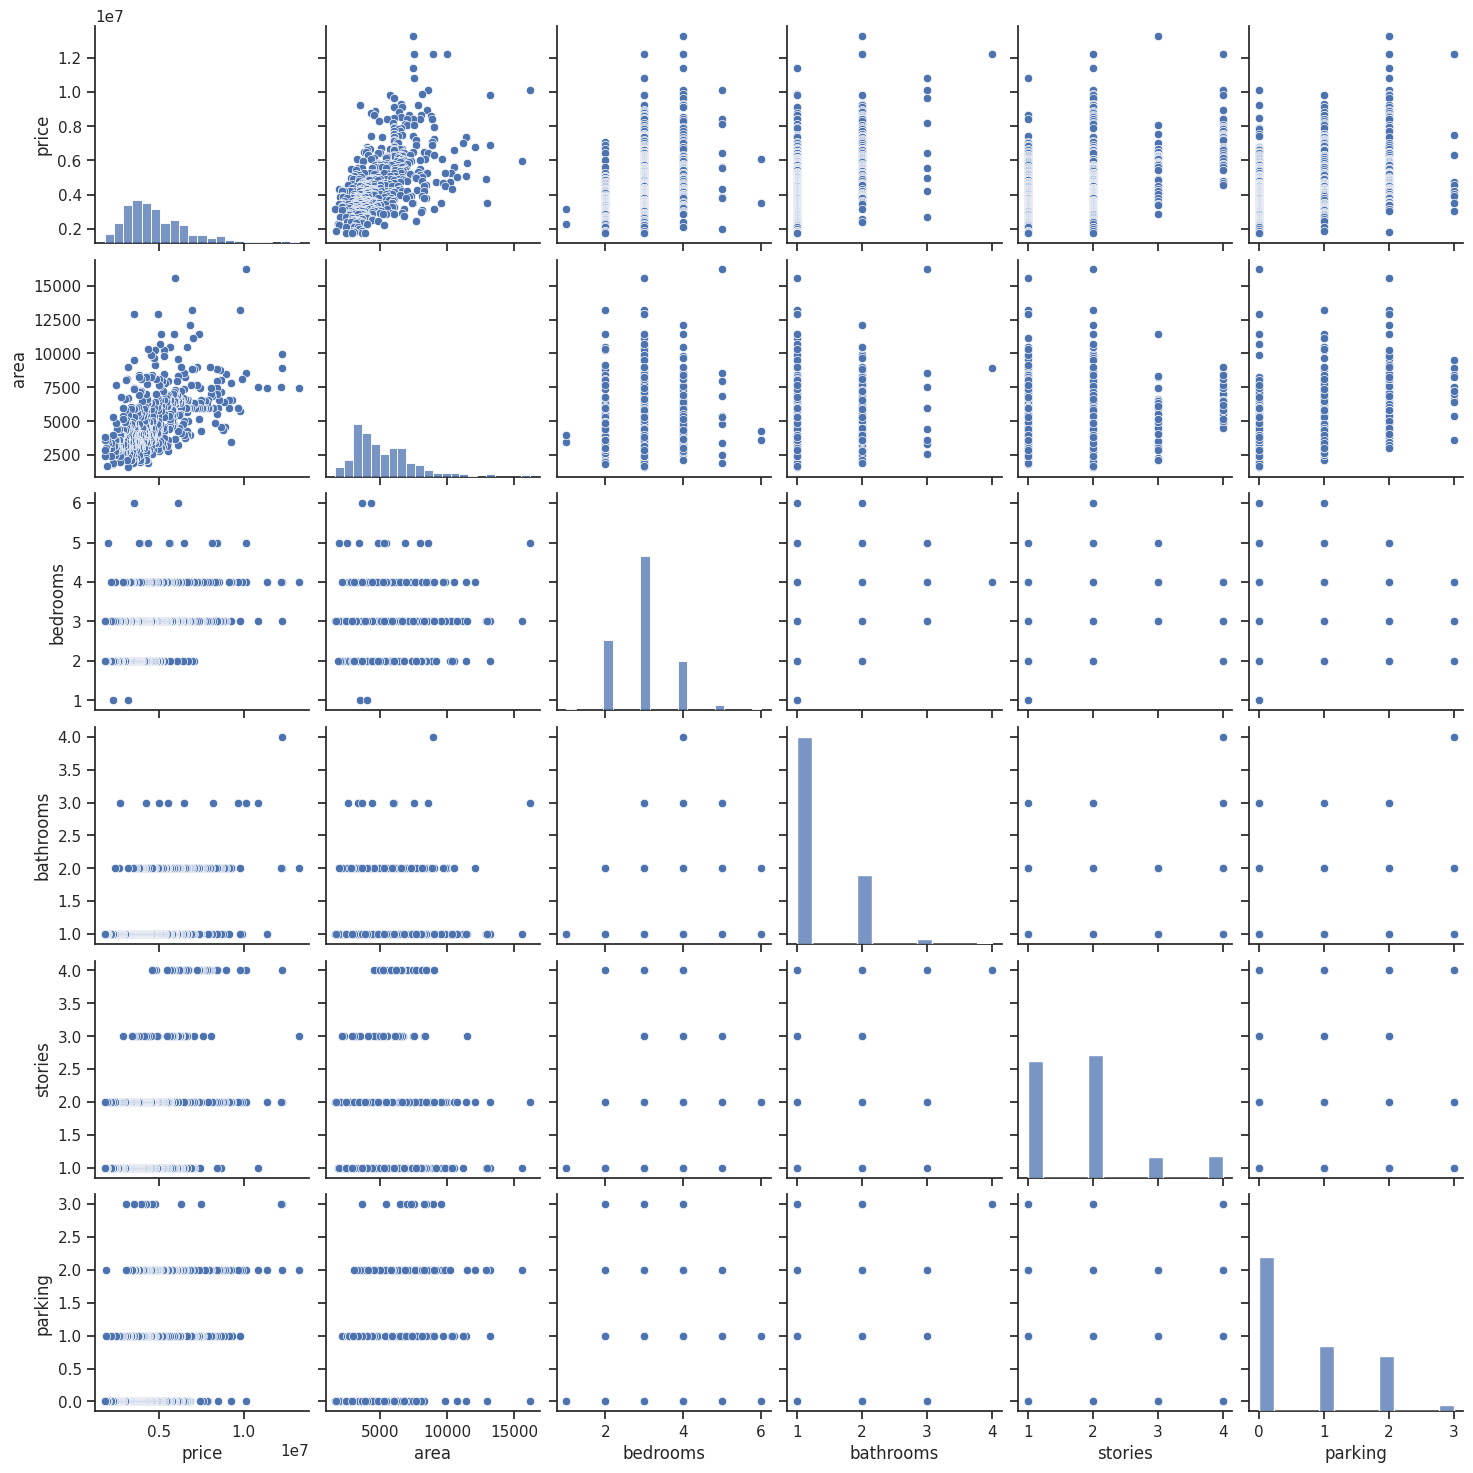

In [94]:
sns.set(style="ticks")
sns.pairplot(df)

In [95]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [96]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


**Visualising Categorical Variables**

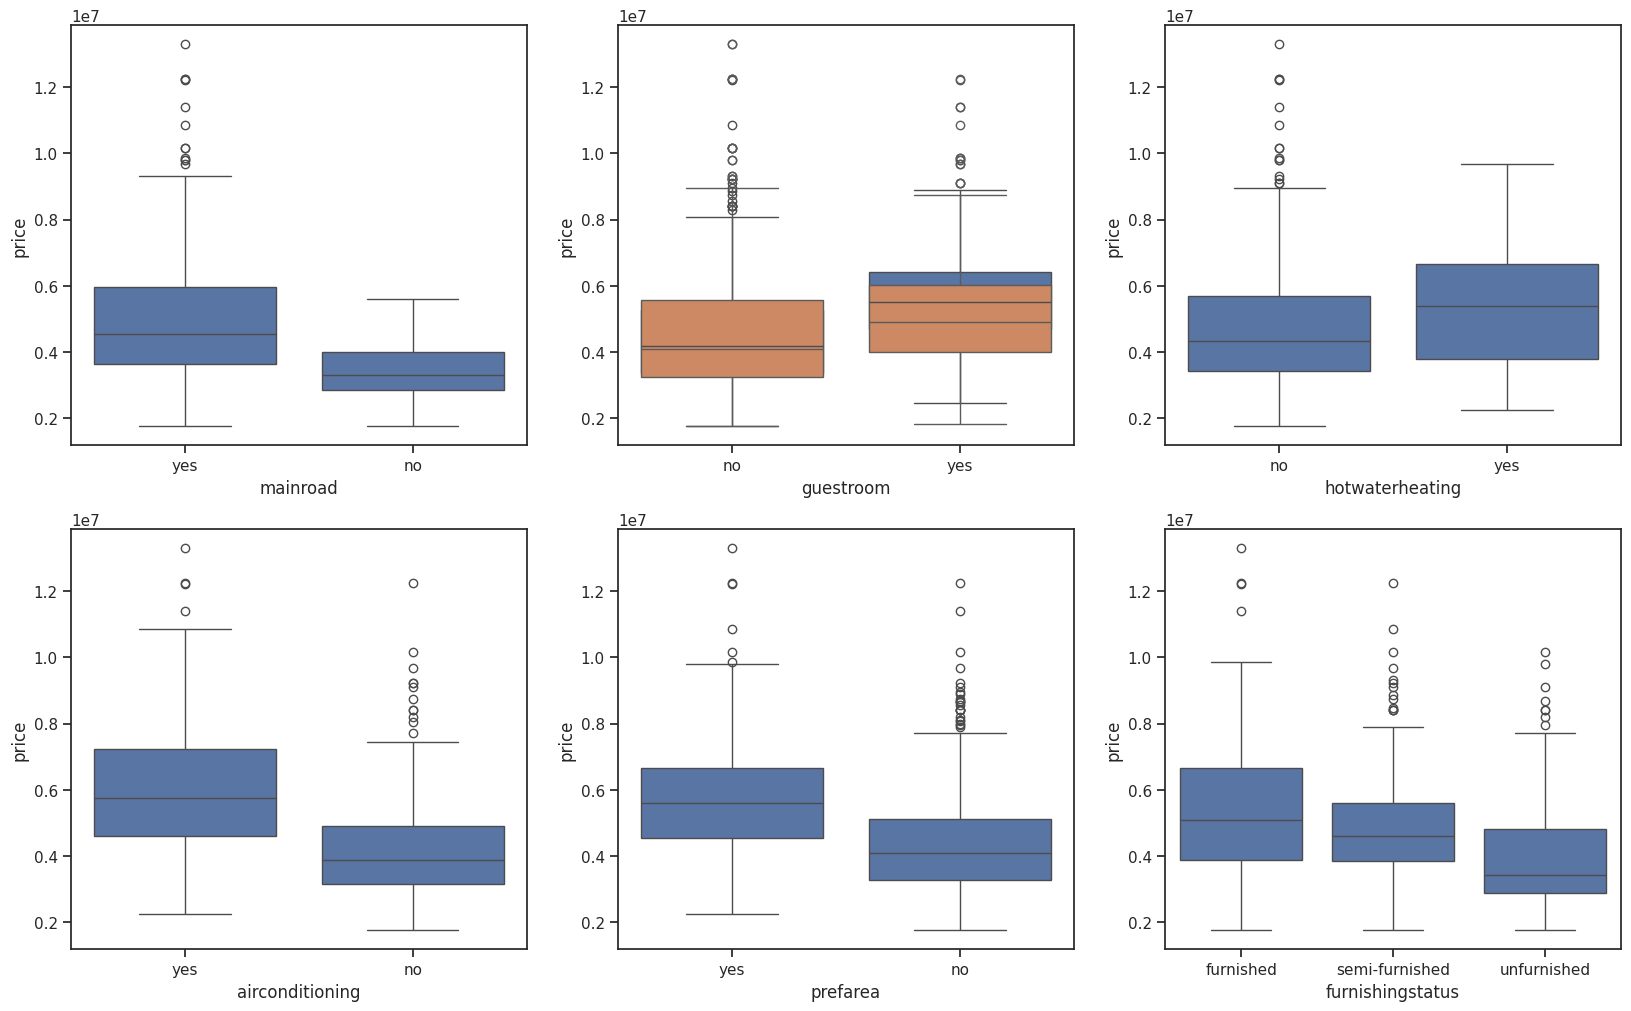

In [97]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='basement',y='price',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='hotwaterheating',y='price',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='airconditioning',y='price',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='prefarea',y='price',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=df)
plt.show()

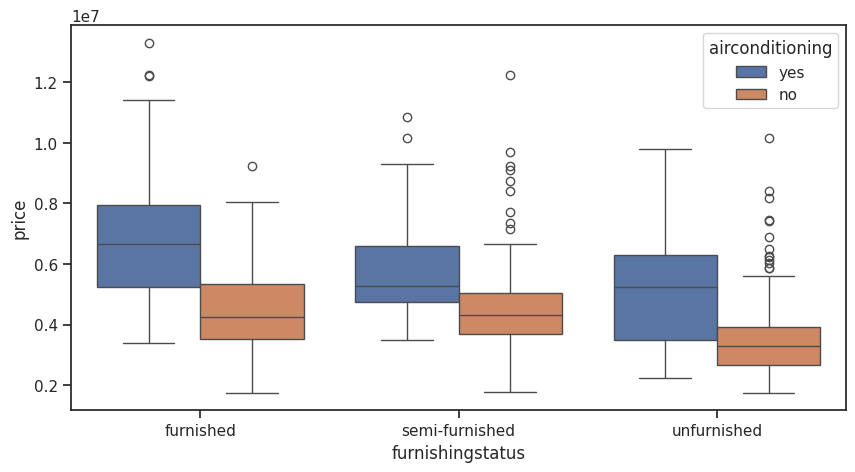

In [98]:
plt.figure(figsize=(10,5))
sns.boxplot(x='furnishingstatus',y='price',hue='airconditioning',data=df)
plt.show()

**Data Preparation**

Convert categorical columns to numbers

In [99]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
  return x.map({'yes':1,'no':0})
df[varlist]=df[varlist].apply(binary_map)


In [100]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [101]:
# One-hot encode 'furnishingstatus' and drop the original column
status = pd.get_dummies(df['furnishingstatus'], drop_first=True).astype(int)

# Drop the original 'furnishingstatus' column and add the new dummy columns
df = pd.concat([df.drop('furnishingstatus', axis=1), status], axis=1)

# Show the updated dataframe
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Step 1: Split features and target
X = df.drop('price', axis=1)
y = df['price']

# Step 2: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 3: Set seed for reproducibility (optional but fine)
np.random.seed(0)

# Step 4: Create a new df_train using sample (if you really want to sample again)
# ⚠️ BUT this step is unnecessary after train_test_split — use either one
df_train = df.sample(frac=0.7, random_state=0)

# Step 5: Scale numerical variables in df_train
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Done
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
239,0.270000,0.161512,0.4,0.0,0.333333,1,0,0,0,0,0.333333,0,0,0
113,0.412667,0.547766,0.4,0.0,0.000000,1,0,1,0,0,0.666667,1,0,0
325,0.215000,0.124399,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0
66,0.493333,0.793814,0.2,0.0,0.000000,1,0,1,1,0,0.333333,0,0,0
479,0.113333,0.138144,0.6,0.0,0.333333,0,0,0,0,0,0.000000,0,0,1


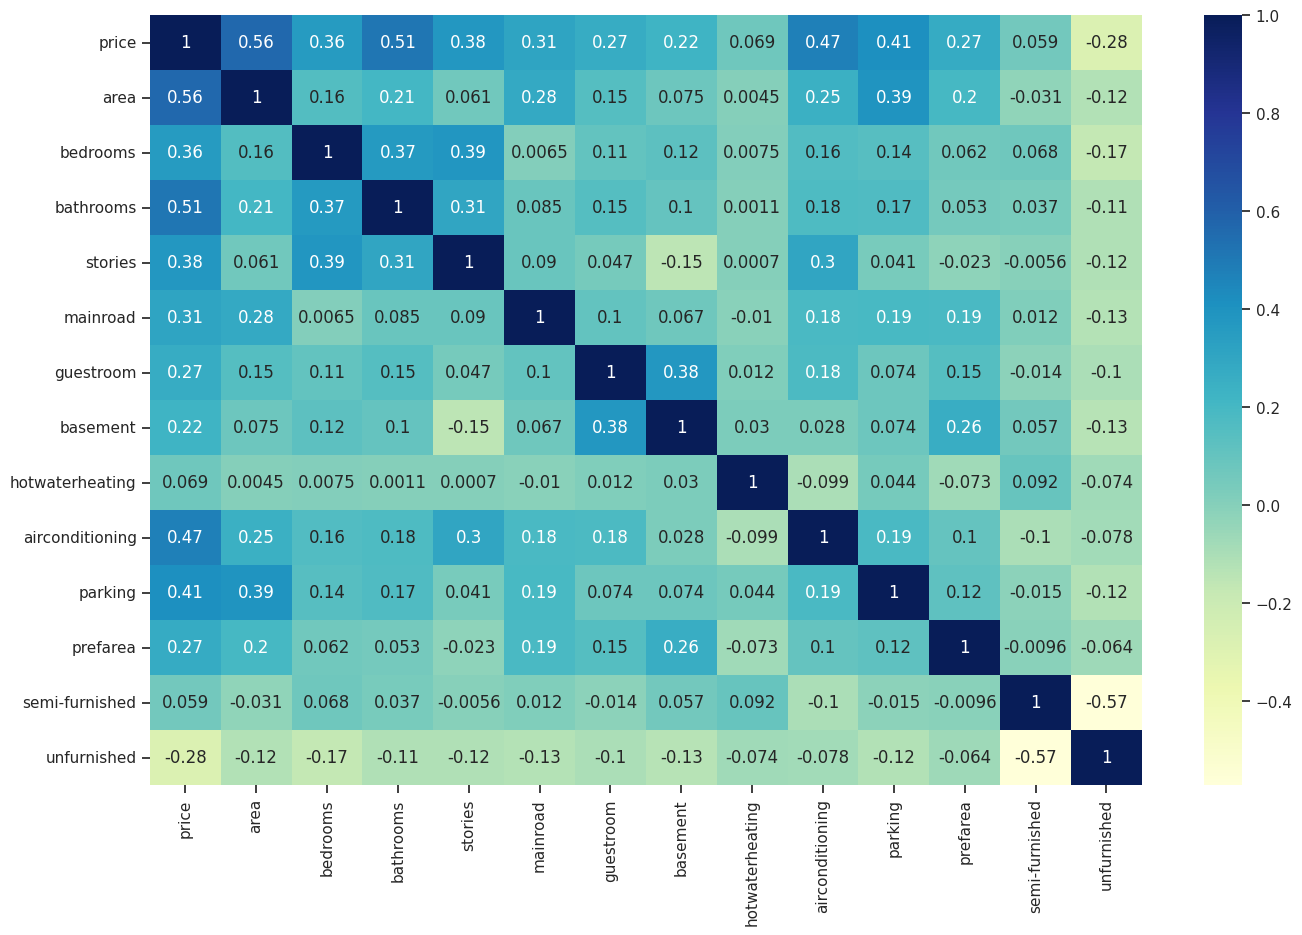

In [103]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()
#checking corelation coeefficient to see which variables are highly corelated

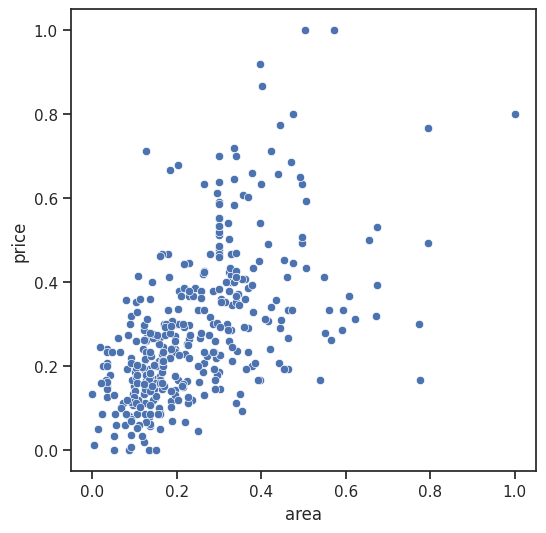

In [104]:
plt.figure(figsize=[6,6])
sns.scatterplot(x='area',y='price',data=df_train)
plt.show()

Dividing into X and Y sets for model building

In [105]:
y_train=df_train.pop('price')
X_train=df_train

**Building Linear Model**

In [107]:
import statsmodels.api as sm

# Add a constant (bias) term to X_train
X_train_lm = sm.add_constant(X_train[['area']])

# Fit the model
lr = sm.OLS(y_train, X_train_lm).fit()


In [108]:
lr.params

,0
const,0.127496
area,0.652694


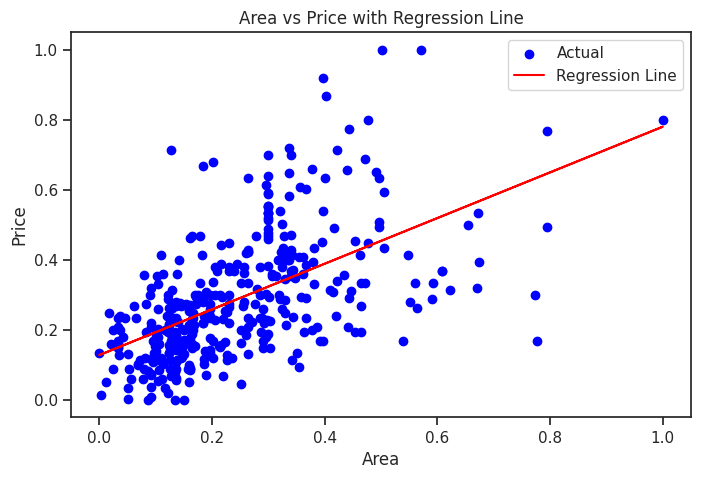

In [109]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simple Linear Regression: only area
X_simple = sm.add_constant(X_train['area'])  # Add constant
lr_simple = sm.OLS(y_train, X_simple).fit()

# Get predictions
y_pred = lr_simple.predict(X_simple)

# Plot scatter + regression line
plt.figure(figsize=(8,5))
plt.scatter(X_train['area'], y_train, color='blue', label='Actual')
plt.plot(X_train['area'], y_pred, color='red', label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price with Regression Line')
plt.legend()
plt.show()


In [111]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           1.42e-33
Time:                        10:26:58   Log-Likelihood:                 192.63
No. Observations:                 382   AIC:                            -381.3
Df Residuals:                     380   BIC:                            -373.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1275      0.014      9.044      0.0